# Project:

## Map 
### 1) PLOTTING FRAMEWORK
### 2) GUI - GTK (most preferable - PNG images, mb plotly..., 
### 3) Data storage - temproraty txt/csv file
### 4) 

## Data 
### a) generation function from the gpx file
### b) Online parsing from the site ???
## Algorithms:
### 1) smoothing (research , l1-filtering(??), Kalman filtering (??), ++)
### 2) approximation etc.
### 3) missle trajectory algorithms (research...)
### 4) 

# Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

In [1]:
%%time
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

ImportError: No module named basemap

# DATA:

## a) Загрузка из файла

In [2]:
import gpxpy
import gpxpy.gpx

In [ ]:
gpx_file = open('data/gps_test.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

In [ ]:
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points[:1]:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

In [28]:
points_ = segment

In [26]:
point.latitude, point.longitude, point.elevation

(55.413575, 37.905227, 180.74639972527)

### Approximation, mathematics etc:

In [133]:
import numpy as np

class Point(object):
    """
    Класс, отвечающий за хранение информации о координатах, скоростях и ускорениях цели в 
    заданной точке и в заданный момент времени.

    Аргументы:
        timestamp: str: строка с датой и временем в в одном из используемых форматов даты.
        x, y, z: floats:  целые числа или числа с плавающей точкой, отвечающие за 
        координаты цели в данный момент времени.
        v_x, v_y, v_z: floats:  целые числа или числа с плавающей точкой, отвечающие 
        за скорость цели в данный момент времени.
        x,_a a_y, a_z: floats:  целые числа или числа с плавающей точкой, отвечающие 
        за ускорения цели в данный момент времени.
    """
    def __init__(self, timestamp=np.nan,
                 x=np.nan, y=np.nan, z=np.nan, 
                 v_x=np.nan, v_y=np.nan, v_z=np.nan, 
                 a_x=np.nan, a_y=np.nan, a_z=np.nan):

        # время, в которое цель находилась в точке (x, y, z)
        self.timestamp = timestamp
        # координаты по трём осям
        self.x = x
        self.y = y
        self.z = z
        # скорости
        self.v_x = v_x
        self.v_y = v_y
        self.v_z = v_z
        # ускорения
        self.a_x = a_x
        self.a_y = a_y
        self.a_z = a_z
        # модуль скорости
        self.v = np.sum(np.array([self.v_x, self.v_y, self.v_z]) ** 2)
        # модуль ускорения
        self.a = np.sum(np.array([self.a_x, self.a_y, self.a_z]) ** 2)
        
    def set_coordinates(self, timestamp, x, y, z, 
                        v_x=np.nan, v_y=np.nan, v_z=np.nan, 
                        a_x=np.nan, a_y=np.nan, a_z=np.nan):
        """
        Добавление координат к инициализированной точке.
        Обязательные атрибуты - время и (x, y, z)
        """
        self.timestamps = timestamp
        self.x, self.y, self.z = x, y, z
        return self
    
    def set_speed(self, v_x, v_y, v_z):
        """
        Добавление скоростей к инициализированной точке.
        Атрибуты - время и скорости по осям (x, y, z)
        """
        self.v_x, self.v_y, self.v_z = v_x, v_y, v_z
        # модуль скорости
        self.v = np.sum(np.array([self.v_x, self.v_y, self.v_z]) ** 2)
        return self
                  
    def set_acceleration(self, a_x, a_y, a_z):
        """
        Добавление ускорений к инициализированной точке.
        Атрибуты - время и ускорения по осям (x, y, z)
        """
        self.a_x, self.a_y, self.a_z = a_x, a_y, a_z
        # модуль ускорения
        self.a = np.sum(np.array([self.a_x, self.a_y, self.a_z]) ** 2)
        return self
    
    def get_coordinates(self):
        """
        Функция выдаёт координаты в формате (x, y, z)
        """
        return np.array([self.x, self.y, self.z])
    
    def get_speed(self):
        """
        Функция выдаёт скорость в формате (v_x, v_y, v_z)
        """
        return np.array([self.v_x, self.v_y, self.v_z])
    
    def get_acceleration(self):
        """
        Функция выдаёт ускорения в формате (a_x, a_y, a_z)
        """
        return np.array([self.a_x, self.a_y, self.a_z])
    
    def get_speed_value(self):
        """
        Функция модуль скорости
        """
        return self.v
    
    def get_acceleration_value(self):
        """
        Функция выдаёт модуль ускорения
        """
        return self.a
    

In [134]:
p = Point("03.10.2010 20:15", 10, 15, 30, 10, 15, 30, 10, 15, 30)

In [135]:
p.get_coordinates()

array([10, 15, 30])

In [86]:
Point.__doc__

'\n    Класс, отвечающий за хранение информации о координатах, скоростях и ускорениях цели в \n    заданной точке и в заданный момент времени.\n\n    Аргументы:\n        timestamp: str: строка с датой и временем в в одном из используемых форматов даты.\n        x, y, z: floats:  целые числа или числа с плавающей точкой, отвечающие за \n        координаты цели в данный момент времени.\n        v_x, v_y, v_z: floats:  целые числа или числа с плавающей точкой, отвечающие \n        за скорость цели в данный момент времени.\n        x,_a a_y, a_z: floats:  целые числа или числа с плавающей точкой, отвечающие \n        за ускорения цели в данный момент времени.\n    '

In [97]:
class Trajectory(object):
    """
    1. Метод, который кушает одну приходящую точку (x, y, z, v_x=np.nan, v_y=np.nan, v_z=np.nan, a_x=np.nan, a_y=np.nan, a_z=np.nan), 
    если тестовый режим работы - зашумляем, если присутствуют только координаты, *считает* скорости, ускорения и сохраняет это в self.x_list, self...
    2. Внутренний методы просчёта, фильтрации и аппроксимации траекторий.
    3. Метод для тестового зашумления данных и тд
    4. 
    """ 
    
    def __init__(self, target="Target_0"):
        # Название и характеристики цели (на данный момент - строка):
        self.target = target
        # Координаты, скорости, ускорения и таймстампы точек траектории
        self.trajectory = []
        # Значения точек траектории, полученные после её обработки одним
        # или несколькими последовательно примененными алгоритмами фильтрации
        # и интерполяции
        self.filtered_trajectory = []
        
        # математические параметры траектории:
        #self.filter_object = # либо рукописный, либо функция из 
        
    
    def add_point_by_coordinates(self, timestamp, x, y, z, 
                                 v_x=np.nan, v_y=np.nan, v_z=np.nan, 
                                 a_x=np.nan, a_y=np.nan, a_z=np.nan):
        """
        Добавление новой точки по координатам:
        
        Аргументы:
            timestamp: str: время и дата в одном из форматов
            x, y, z: float: целые или числа с плавающей точкой - координаты цели...
            
            
            
        """
        self.trajectory.append(Point(timestamp, x, y, z, v_x , v_y, v_z, a_x, a_y, a_z))
        return self
    
    def add_point(self, point):
        """
        Добавление новой точки:
        
        Аргументы:
            point: Point: объект класса Point, 
        """
        self.trajectory.append(point)
        self._filter_trajectory(filtring_type="l1_filtering")
        self._recompute_speed()
        self._recompute_accelerations()
        return self

        
#     def add_point_by_coordinates(self, timestamp, x, y, z, 
#                                  v_x=np.nan, v_y=np.nan, v_z=np.nan, 
#                                  a_x=np.nan, a_y=np.nan, a_z=np.nan):
#         # добавляем пришедшую точку
#         self.points.append(point)
        
#         # если приходило более одной точки мы можем посчитать скорость, если вместо нее пришло np.nan
#         if len(self.points) > 1:
#             time_delay = self.points[-1].timestamp - self.points[-2].timestamp
#             if not self.points[-1].v_x:
#                 self.points[-1].v_x = (self.points[-1].x - self.points[-2].x) / time_delay
#             if not self.points[-1].v_y:
#                 self.points[-1].v_y = (self.points[-1].y - self.points[-2].y) / time_delay
#             if not self.points[-1].v_z:
#                 self.points[-1].v_z = (self.points[-1].z - self.points[-2].z) / time_delay       
            
#         # если две последние точки не содержат np.nan в скорости, мы можем посчитать ускорение, если вместо него пришло np.nan
#         if not self.points[-1].a_x:
            
            
            
#             time_delay = self.points[-1].timestamp - self.points[-2].timestamp
            
#             self.points[-1].a_x = (self.points[-2].v_x - self.points[-1].v_x) / timestamp
            
            
            
        
#         if self.points[-1].:
#             time_delay = self.points[-1].timestamp - self.points[-2].timestamp
#             if not self.points[-1].v_x:
#                 self.points[-1].v_x = (self.points[-1].x - self.points[-2].x) / time_delay
#             if not self.points[-1].v_y:
#                 self.points[-1].v_y = (self.points[-1].y - self.points[-2].y) / time_delay
#             if not self.points[-1].v_z:
#                 self.points[-1].v_z = (self.points[-1].z - self.points[-2].z) / time_delay  
             
#  =========================================== MATH =================
        def _filter_trajectory(self, filtring_type=None):
            """
            Фильтрация и сглаживание траектории одним из способов:
            """
#             # на данный момент мы используем траекторию без фильтрации:
#             self.filtered_trajectory = self.trajectory
            
            def savgol(y, window=20, order=5, deriv=0, rate=1):
    
                from math import factorial

                order_range = range(order+1)
                half_window = (window - 1) // 2
                b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
                m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
                firstvals = y[0] - np.abs(y[1:half_window+1][::-1]-y[0])
                lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1]-y[-1])
                y = np.concatenate((firstvals,y,lastvals))
                return np.convolve(m[::-1],y,mode='valid')
            
            self.filtered_trajectory = self.trajectory
            self.filtered_trajectory[:].x = savgol(self.trajectory[:].x)
            self.filtered_trajectory[:].y = savgol(self.trajectory[:].y)
            self.filtered_trajectory[:].z = savgol(self.trajectory[:].z) 
            
            return self.filtered_trajectory
        
        def _recompute_speed(self, ts_window=1):
            """
            Вычисление скоростей через приращение координаты усреднённое в окне
            
            Аргументы:
                ts_window: int: количество точек траектории, взятых для усреднения скорости
            """
            ### TIME_DIFF computation нужно сделать перевод разницы в нормальные единицы
            time_diff = self.filtered_trajectory[-1].timestamp -\
                            self.filtered_trajectory[-2].timestamp 
                
            coordinates_diff = self.filtered_trajectory[-1].get_coordinates() -\
                                self.filtered_trajectory[-2].get_coordinates()
                
            differential_speed = coordinates_diff / time_diff
            
            self.filtered_trajectory[-1].set_speed(differential_speed[0], 
                                                   differential_speed[1], 
                                                   differential_speed[2])
        
        def _recompute_acceleration(self, ts_window=1):
            """
            Вычисление ускорений через приращение скорости усреднённое в окне
            
            Аргументы:
                TODO:
                ts_window: int: количество точек траектории, взятых для усреднения ускорения
            """
            ### TIME_DIFF computation нужно сделать перевод разницы в нормальные единицы
            time_diff = self.filtered_trajectory[-1].timestamp -\
                            self.filtered_trajectory[-2].timestamp 
                
            speed_diff = self.filtered_trajectory[-1].get_speed() -\
                                self.filtered_trajectory[-2].get_speed()
                
            differential_acceleration = speed_diff / time_diff
            
#             self.filtered_trajectory[-1].set_acceleration(differential_acceleration[0], 
#                                                           differential_acceleration[1], 
#                                                           differential_acceleration[2])
            self.filtered_trajectory[-1].set_acceleration(*list(differential_acceleration))

In [532]:
class Trajectory(object):
    """
    1. Метод, который кушает одну приходящую точку (x, y, z, v_x=np.nan, v_y=np.nan, v_z=np.nan, a_x=np.nan, a_y=np.nan, a_z=np.nan), 
    если тестовый режим работы - зашумляем, если присутствуют только координаты, *считает* скорости, ускорения и сохраняет это в self.x_list, self...
    2. Внутренний методы просчёта, фильтрации и аппроксимации траекторий.
    3. Метод для тестового зашумления данных и тд
    4. 
    """ 
    
    def __init__(self, target="Target_0"):
        # Название и характеристики цели (на данный момент - строка):
        self.target = target
        # Координаты, скорости, ускорения и таймстампы точек траектории
        self.trajectory = []
        # Значения точек траектории, полученные после её обработки одним
        # или несколькими последовательно примененными алгоритмами фильтрации
        # и интерполяции
        self.filtered_trajectory = []
        
    
    def add_point_by_coordinates(self, timestamp, x, y, z, 
                                 v_x=np.nan, v_y=np.nan, v_z=np.nan, 
                                 a_x=np.nan, a_y=np.nan, a_z=np.nan):

        self.trajectory.append(Point(timestamp, x, y, z, v_x , v_y, v_z, a_x, a_y, a_z))
        return self
    
    def add_point(self, point):
        """
        Добавление новой точки:
        
        Аргументы:
            point: Point: объект класса Point, 
        """
        self.trajectory.append(point)
        self._filter_trajectory(filtring_type="l1_filtering")
        self._recompute_speed()
        self._recompute_accelerations()
        return self

    def _filter_trajectory(self, filtring_type=None):
        
        import copy
        """
        Фильтрация и сглаживание траектории одним из способов:
        Нужно минимум window точек
        """
#             # на данный момент мы используем траекторию без фильтрации:
#             self.filtered_trajectory = self.trajectory

        def savgol(arr, window=15, order=5, deriv=0, rate=1):
            #window >= order + 2

            from math import factorial
            
            if len(arr) < window:
                window = len(arr)
                if window < order + 2:
                    order = window - 2
            
            y = np.asarray(arr[:])
            order_range = range(order+1)
            half_window = (window - 1) // 2
            b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
            m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
            firstvals = y[0] - np.abs(y[1:half_window+1][::-1]-y[0])
            lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1]-y[-1])
            y = np.concatenate((firstvals,y,lastvals))
            return np.convolve(m[::-1],y,mode='valid')

        self.filtered_trajectory = copy.deepcopy(self.trajectory)
        
        filtered_coordinate = savgol([self.trajectory[i].x for i in range(len(self.trajectory))])
        for i in range(len(self.filtered_trajectory)):
            self.filtered_trajectory[i].x = filtered_coordinate[i]       
        filtered_coordinate = savgol([self.trajectory[i].y for i in range(len(self.trajectory))])
        for i in range(len(self.filtered_trajectory)):
            self.filtered_trajectory[i].y = filtered_coordinate[i]
        filtered_coordinate = savgol([self.trajectory[i].z for i in range(len(self.trajectory))])
        for i in range(len(self.filtered_trajectory)):
            self.filtered_trajectory[i].z = filtered_coordinate[i]
        
        return self.filtered_trajectory
        


In [543]:
test = Trajectory()

In [575]:
sig = 1.3
a = 30
b = 20
trajectory = np.asarray([[i+np.random.randn()/sig,i+np.random.randn()/sig] for i in range(a)]+[[a+i+np.random.randn()/sig,a+np.random.randn()/sig] for i in range(b)]+[[a+b+i+np.random.randn()/sig,a+i+np.random.randn()/sig] for i in range(20)])
pure_traj = np.asarray([[i,i] for i in range(a)]+[[a+i,a] for i in range(b)]+[[a+b+i,a+i] for i in range(20)])

In [576]:
for i in range(2):
    test.add_point_by_coordinates(0.1,trajectory[i][0],trajectory[i][1],0.1)

In [577]:
len([test.trajectory[i].x for i in range(len(test.trajectory))])

4

In [578]:
[test.trajectory[i].x for i in range(len(test.trajectory))]

[0.44795937311873801,
 0.97591426687936988,
 -0.06147491186426509,
 0.60055138339131631]

In [579]:
test._filter_trajectory()

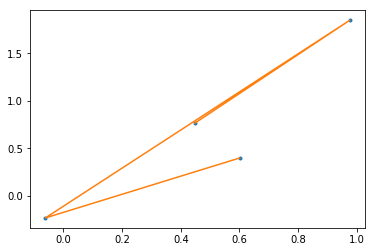

In [580]:
plt.close()
plt.plot([test.trajectory[i].x for i in range(len(test.trajectory))],[test.trajectory[i].y for i in range(len(test.trajectory))],'.')
plt.plot([test.filtered_trajectory[i].x for i in range(len(test.filtered_trajectory))],[test.filtered_trajectory[i].y for i in range(len(test.filtered_trajectory))])
plt.show()

In [327]:
def savgol(y, window=15, order=5, deriv=0, rate=1):

            from math import factorial
    
            y = np.asarray(y)
            order_range = range(order+1)
            half_window = (window - 1) // 2
            b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
            m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
            firstvals = y[0] - np.abs(y[1:half_window+1][::-1]-y[0])
            lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1]-y[-1])
            y = np.concatenate((firstvals,y,lastvals))
            return np.convolve(m[::-1],y,mode='valid')

In [2]:
def interpolate_polyline(polyline, num_points):
    duplicates = []
    for i in range(1, len(polyline)):
        if np.allclose(polyline[i], polyline[i-1]):
            duplicates.append(i)
    if duplicates:
        polyline = np.delete(polyline, duplicates, axis=0)
    tck, u = interp.splprep(polyline.T, s=0)
    u = np.linspace(0.0, 1.0, num_points)
    return np.column_stack(interp.splev(u, tck))

In [8]:
def savgol(y, window, order, deriv=0, rate=1):
    
    from math import factorial
    
    order_range = range(order+1)
    half_window = (window - 1) // 2
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    firstvals = y[0] - np.abs(y[1:half_window+1][::-1]-y[0])
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1]-y[-1])
    y = np.concatenate((firstvals,y,lastvals))
    return np.convolve(m[::-1],y,mode='valid')

In [124]:
sig = 1.2
a = 30
b = 20
trajectory = np.asarray([[i+np.random.randn()/sig,i+np.random.randn()/sig] for i in range(a)]+[[a+i+np.random.randn()/sig,a+np.random.randn()/sig] for i in range(b)]+[[a+b+i+np.random.randn()/sig,a+i+np.random.randn()/sig] for i in range(20)])
pure_traj = np.asarray([[i,i] for i in range(a)]+[[a+i,a] for i in range(b)]+[[a+b+i,a+i] for i in range(20)])

In [6]:
import scipy.ndimage
# from scipy import *

In [116]:
trajectory = list(trajectory)
for i in range(10):
#     del trajectory[10]
    del trajectory[20]
trajectory = np.asarray(trajectory)

In [550]:
from scipy.misc import imread


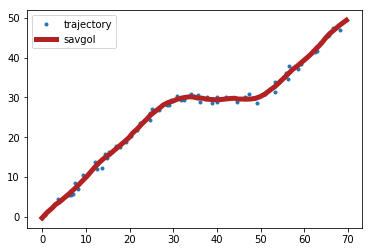

In [582]:
plt.close()
plt.plot(trajectory[:,0],trajectory[:,1],'.',label='trajectory')

# npoints = np.round(0.21*len(trajectory))
# plt.plot(interpolate_polyline(trajectory,npoints)[:,0],interpolate_polyline(trajectory,npoints)[:,1],label='ip')
# window = 2
# plt.plot(scipy.ndimage.gaussian_filter(trajectory,window)[:,0],scipy.ndimage.gaussian_filter(trajectory,window)[:,1],label='Gaussian')
# plt.imshow(img,extent=[0, img.shape[1], 0, img.shape[0]])
plt.plot(savgol(trajectory[:,0],20,5),savgol(trajectory[:,1],20,5),label='savgol',  linewidth=5, color='firebrick')
# plt.plot(pure_traj[:,0],pure_traj[:,1],label='trajectory')
plt.legend()
# img = imread('data/map.jpg')

plt.show()

(1541, 1197, 3)


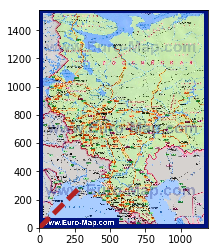

In [570]:
fig, ax = plt.subplots()
x = range(300)
print img.shape
ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
ax.plot(x, x, '--', linewidth=5, color='firebrick')
plt.show()

In [76]:
obj = GPS()

In [11]:
obj.add_point(0.2,0.3,0.2)

In [16]:
if 0.2:
    print(True)

True
